In [21]:
from Lens_Search import QSOFluxProcessor
from astropy.io import fits


import os
import json
import numpy as np



In [35]:
# Define the path to the FITS file you want to open
fits_file_path = os.path.join(os.path.expandvars('$SCRATCH/Pipeline'), 'Test_Phase2_Objects.fits')

# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # Print the HDU (Header/Data Unit) list
    hdul.info()
    
    # Access the primary HDU
    primary_hdu = hdul[0]
    print("Primary HDU Header:")
    print(primary_hdu.header)
    
    # Access the binary table HDU
    binary_table_hdu = hdul[1]
    data = binary_table_hdu.data

    # Print the column names
    print("\nColumn names in the binary table HDU:")
    print(data.columns.names)
    
    # Access data from columns
    target_ids = data['TARGETID']
    redshifts = data['Z']
    fluxes = data['FLUX']
    labels = data['LABEL']
    elg_fluxes = data['ELG_z']  # Access the ELG flux column
    ename = data['ELG_NAME']
    ivar = data['ivar']

# Output some information about the data
print("\nNumber of entries:", len(data))


Filename: /pscratch/sd/e/edm2158/Pipeline/Test_Phase2_Objects.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     22   3547R x 7C   [K, D, PD(7781), PD(7781), I, D, 20A]   
Primary HDU Header:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                             

In [36]:
#%%time 
results = QSOFluxProcessor.process(fluxes, 2, target_ids, ivar, redshifts)

111/111 [==============================] - 3s 27ms/step


In [37]:
one = np.where(labels == 1)[0]

In [38]:
results.iloc[one]

,Name,z_qso,Score,Classification,Predicted Redshift,Fitted Redshift,Redshift Error,Best Chi-Squared,Amp1,Err_Amp1,Mean1,Err_Mean1,Sigma1,Err_Sigma1,Mean2,Err_Mean2,Cont,Err_Cont,SNR
1,39627930178947635,1.469252,1.000000,Lens,1.536514,1.543371,0.000099,1.325836,1.637972,0.168856,9476.600000,0.369184,9482.600000,0.402700,2.684350,0.340894,0.735314,0.007499,2.983845
6,39627930204112764,1.322749,0.999994,Lens,1.593077,1.533842,0.000350,3.151956,0.936963,1.256082,9441.095537,1.305888,9443.400000,1.541484,0.612087,0.620535,1.087992,0.009386,1.034717
24,39627936172608065,1.175041,1.000000,Lens,1.517556,1.527483,0.000048,1.436297,4.317512,0.177533,9417.400000,0.179767,9423.400000,0.122065,3.837827,0.174235,0.907274,0.006748,23.567018
27,39627936176801719,1.533239,1.000000,Lens,1.563256,1.560548,0.000082,1.218047,2.007027,0.139599,9540.600000,0.303965,9546.600000,0.162978,3.607600,0.263565,0.231232,0.007951,11.660035
35,39627936189388850,1.582232,0.013749,QSO,1.618826,1.550281,0.000145,1.041815,0.694298,0.347706,9502.345284,0.538962,9505.000000,0.930799,0.675102,0.426654,0.568222,0.011182,1.541612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,39628091210862531,0.988225,1.000000,Lens,1.395477,1.416908,0.000023,1.908445,3.430616,0.054912,9005.400000,0.085890,9011.400000,0.041840,3.195585,0.049827,0.789924,0.003602,26.830050
3504,39628091219251541,1.406404,0.985837,Lens,1.423495,1.427785,0.000045,1.372931,2.228863,0.128397,9045.925214,0.167146,9051.511883,0.149483,3.338379,0.190803,2.405448,0.005837,29.830454
3514,39628091223444567,1.114232,1.000000,Lens,1.252999,1.256522,0.000049,1.298356,1.897608,0.088306,8407.800000,0.184410,8413.800000,0.161525,3.282102,0.187504,1.052790,0.005917,21.441926
3517,39628091227637227,0.974521,1.000000,Lens,1.419996,1.426355,0.000061,1.134276,1.526209,0.092799,9040.600000,0.227273,9046.600000,0.165429,3.345597,0.236879,0.535163,0.005586,12.616274


In [26]:
np.where(results['Classification'].iloc[one] == 'QSO')

(array([  8,  20,  28,  32,  37,  41,  60,  62,  64,  81, 104, 131, 161,
        226, 234, 248]),)

In [9]:
red_fit = results.iloc[one]['Fitted Redshift']
SNR = results.iloc[one]['SNR']

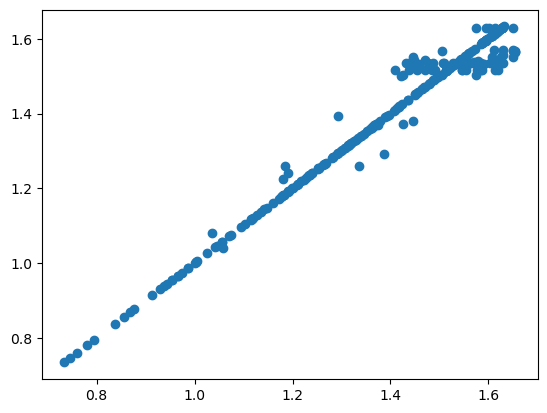

In [10]:
import matplotlib.pyplot as plt
plt.scatter(elg_fluxes[one], results.iloc[one]['Fitted Redshift'])

In [11]:
np.savez('Phase_1_Machine_mask', red_fit=red_fit, SNR=SNR, true=elg_fluxes[one])
np.savez('Phase_1_Machine_nofit_mask', red_fit=results.iloc[one]['Predicted Redshift'], SNR=SNR, true=elg_fluxes[one])

['Lens' 'QSO']
Number of QSOs:  16
Number of non-QSOs:  253


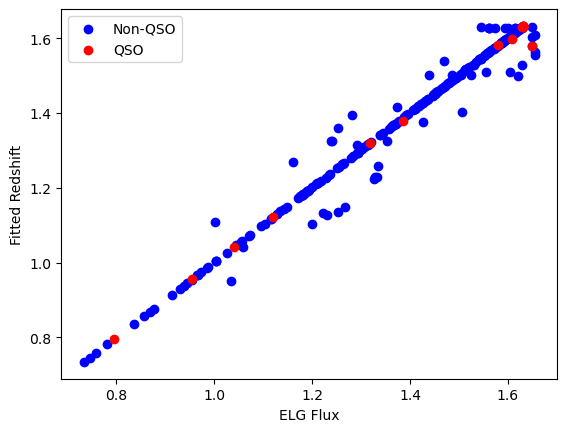

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Check if the classification is correct
print(np.unique(results['Classification'].iloc[one]))  # Check the unique classifications

# Create a mask for QSO classification
qso_mask = results['Classification'].iloc[one] == 'QSO'

# Ensure that qso_mask is applied correctly
print("Number of QSOs: ", np.sum(qso_mask))  # Count how many True values there are in the mask
print("Number of non-QSOs: ", np.sum(~qso_mask))  # Count how many False values there are in the mask

# Scatter plot with different colors based on classification
plt.scatter(elg_fluxes[one][~qso_mask], results.iloc[one]['Fitted Redshift'][~qso_mask], color='blue', label='Non-QSO')
plt.scatter(elg_fluxes[one][qso_mask], results.iloc[one]['Fitted Redshift'][qso_mask], color='red', label='QSO')

# Labels and legend
plt.xlabel("ELG Flux")
plt.ylabel("Fitted Redshift")
plt.legend()
plt.show()


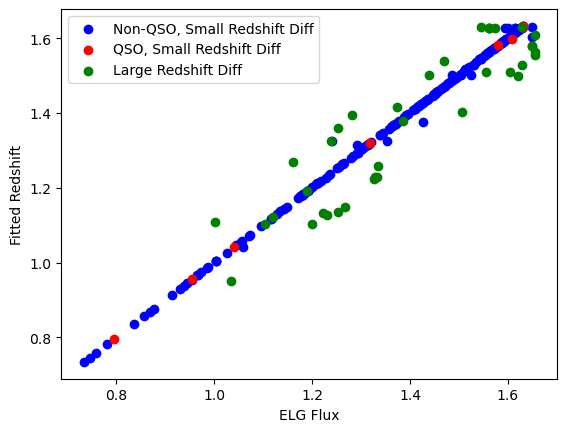

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mask for QSO classification
qso_mask = results['Classification'].iloc[one] == 'QSO'

# Create a mask for redshift difference > 0.1
redshift_diff_mask = np.abs(results['Fitted Redshift'].iloc[one] - results['Predicted Redshift'].iloc[one]) > 0.05

# Filter the results where the condition is met
filtered_results = results.iloc[one][redshift_diff_mask]

# Plot all points
plt.scatter(elg_fluxes[one][~qso_mask & ~redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][~qso_mask & ~redshift_diff_mask], 
            color='blue', label='Non-QSO, Small Redshift Diff')

# Plot QSO points
plt.scatter(elg_fluxes[one][qso_mask & ~redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][qso_mask & ~redshift_diff_mask], 
            color='red', label='QSO, Small Redshift Diff')

# Plot points where redshift difference > 0.1
plt.scatter(elg_fluxes[one][redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][redshift_diff_mask], 
            color='green', label='Large Redshift Diff')

# Labels and legend
plt.xlabel("ELG Flux")
plt.ylabel("Fitted Redshift")
plt.legend()
plt.show()


In [12]:
results['Mean1'].iloc[1096]

9444.094652764472

In [13]:
np.savez('Phase_1_Machine', red_fit=red_fit, SNR=SNR, true=elg_fluxes[one])
np.savez('Phase_1_Machine_nofit', red_fit=results.iloc[one]['Predicted Redshift'], SNR=SNR, true=elg_fluxes[one])

(9600.0, 9800.0)

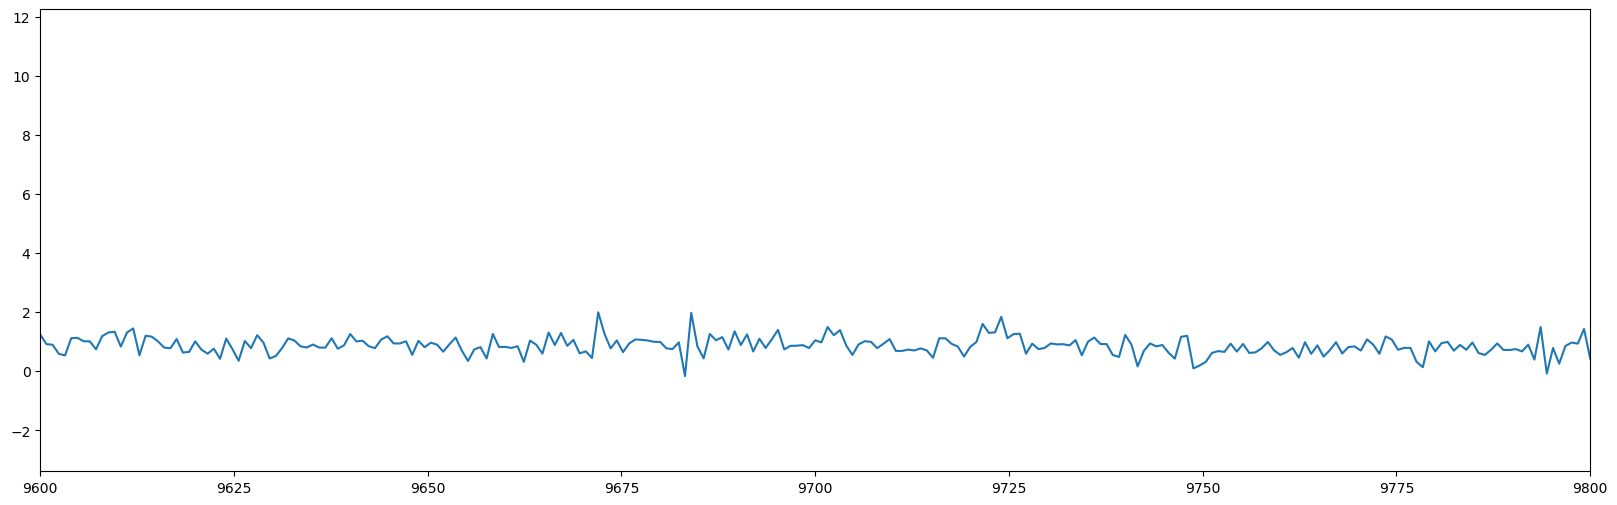

In [14]:
plt.figure(figsize = (20,6))
waves = np.load('wave.npy')  
plt.plot(waves, fluxes[361])
plt.axvline(results['Mean1'].iloc[361], color = 'red')
plt.axvline(3737*(1+results['Predicted Redshift'].iloc[361]), color = 'green')
plt.xlim(9600, 9800)

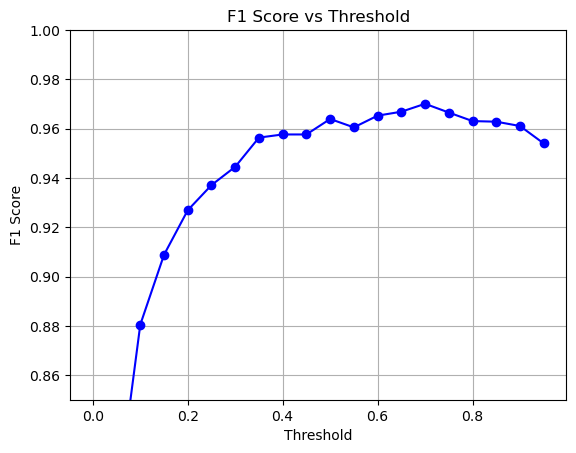

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# Define the threshold range you want to test
thresholds = np.arange(0, 1, 0.05)

# Store the F1 scores for each threshold
f1_scores = []

# Loop through each threshold
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)
    
    # Append the F1 score to the list
    f1_scores.append(f1)

# Plot the F1 score vs threshold
plt.plot(thresholds, f1_scores, marker='o', color='blue')  # Scale thresholds by 100 to match your plot
plt.ylim(.85,1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.show()


In [40]:
import numpy as np

np.savez('Phase2_f1_thresh_plot.npz', f1_scores=f1_scores, thresholds=thresholds)


In [43]:
import numpy as np
from sklearn.metrics import f1_score

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels.copy()  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# ---- Save Original y_true for No Filtering Case ----
y_true_original = labels.copy()  # Keep the original labels without any filtering

# ---- Filter and set labels for objects that are filtered out ----
snr_threshold = 3

# For objects that are filtered out, set their labels to 0
filtered_indices = results['z_qso'] >3
y_true[filtered_indices] = 0

# ---- Create Binary Predictions Based on the Chosen Threshold ----
best_threshold = 0.7  # Choose a threshold (you can choose the one that gives the best F1 score)

# Convert predicted probabilities to binary predictions using the chosen threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# ---- Calculate F1 score for the filtered case ----
f1_combined_filtered = f1_score(y_true, y_pred_best)

# ---- Calculate F1 score for the unfiltered case (original y_true) ----
f1_combined_unfiltered = f1_score(y_true_original, y_pred_best)

# Print both F1 scores
print(f'F1 Score at Threshold = {best_threshold} with filtering (SNR >= {snr_threshold}): {f1_combined_filtered:.4f}')
print(f'F1 Score at Threshold = {best_threshold} without filtering: {f1_combined_unfiltered:.4f}')
#Pandas dataframe filtering? Do all the cuts at once? :Look at pandas website maybe chatgpt

F1 Score at Threshold = 0.7 with filtering (SNR >= 3): 0.9701
F1 Score at Threshold = 0.7 without filtering: 0.9701


In [9]:
import numpy as np
from sklearn.metrics import f1_score

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels.copy()  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# ---- Save Original y_true for No Filtering Case ----
y_true_original = labels.copy()  # Keep the original labels without any filtering

# ---- Filter and set labels for objects that are filtered out ----
snr_threshold = 3

# For objects that are filtered out, set their labels to 0
filtered_indices = (results['z_qso'] > results['Fitted Redshift']) & (results['SNR'] > 3)

y_true[filtered_indices] = 0

# ---- Create Binary Predictions Based on the Chosen Threshold ----
best_threshold = 0.7  # Choose a threshold (you can choose the one that gives the best F1 score)

# Convert predicted probabilities to binary predictions using the chosen threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# ---- Calculate F1 score for the filtered case ----
f1_combined_filtered = f1_score(y_true, y_pred_best)

# ---- Calculate F1 score for the unfiltered case (original y_true) ----
f1_combined_unfiltered = f1_score(y_true_original, y_pred_best)

# Print both F1 scores
print(f'F1 Score at Threshold = {best_threshold} with filtering (SNR >= {snr_threshold}): {f1_combined_filtered:.4f}')
print(f'F1 Score at Threshold = {best_threshold} without filtering: {f1_combined_unfiltered:.4f}')


F1 Score at Threshold = 0.7 with filtering (SNR >= 3): 0.9522
F1 Score at Threshold = 0.7 without filtering: 0.9504


F1 Score at Threshold = 0.7 with filtering (SNR >= 3): 0.9522


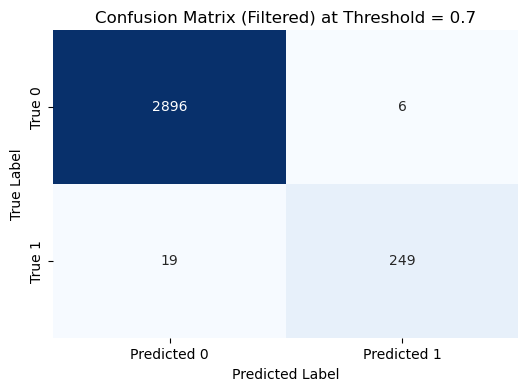

In [10]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels.copy()  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# ---- Filter and set labels for objects that are filtered out ----
snr_threshold = 3

# For objects that are filtered out, set their labels to 0
filtered_indices = (results['z_qso'] > results['Fitted Redshift']) & (results['SNR'] > snr_threshold)
y_true[filtered_indices] = 0

# ---- Create Binary Predictions Based on the Chosen Threshold ----
best_threshold = 0.7  # Choose a threshold (you can choose the one that gives the best F1 score)

# Convert predicted probabilities to binary predictions using the chosen threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# ---- Calculate F1 score for the filtered case ----
f1_combined_filtered = f1_score(y_true, y_pred_best)

# Print the F1 score
print(f'F1 Score at Threshold = {best_threshold} with filtering (SNR >= {snr_threshold}): {f1_combined_filtered:.4f}')

# ---- Confusion Matrix for Filtered Case (After Setting Labels to 0) ----
conf_matrix_filtered = confusion_matrix(y_true, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title(f'Confusion Matrix (Filtered) at Threshold = {best_threshold}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


F1 Score at Threshold = 0.7 with filtering (SNR >= 3): 0.9261


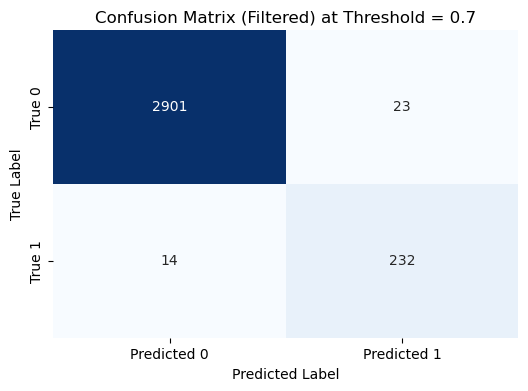

In [11]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels.copy()  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# ---- Filter and set labels for objects that are filtered out ----
snr_threshold = 3

# For objects that are filtered out, set their labels to 0
filtered_indices = (results['z_qso'] > results['Fitted Redshift'])
y_true[filtered_indices] = 0

# ---- Create Binary Predictions Based on the Chosen Threshold ----
best_threshold = 0.7  # Choose a threshold (you can choose the one that gives the best F1 score)

# Convert predicted probabilities to binary predictions using the chosen threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# ---- Calculate F1 score for the filtered case ----
f1_combined_filtered = f1_score(y_true, y_pred_best)

# Print the F1 score
print(f'F1 Score at Threshold = {best_threshold} with filtering (SNR >= {snr_threshold}): {f1_combined_filtered:.4f}')

# ---- Confusion Matrix for Filtered Case (After Setting Labels to 0) ----
conf_matrix_filtered = confusion_matrix(y_true, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title(f'Confusion Matrix (Filtered) at Threshold = {best_threshold}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [14]:
waves = np.load('wave.npy')  # Load your wavelength data

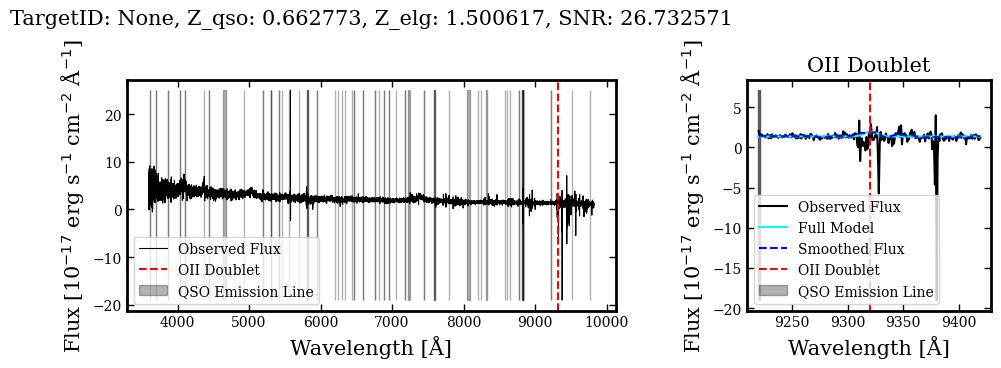

In [20]:
QSOFluxProcessor.plot_gaussian_fit_with_subplots(fluxes[329], 
                                                 waves, 
                                                 0.662773, 
                                                 1.469160, 
                                                 None, 
                                                 26.732571,
                                                 1/np.sqrt(ivar[329]),
                                                 save_path=None, 
                                                 plot_qso_lines=True, 
                                                 show_plot=True
                                                )

In [12]:
import numpy as np
import pandas as pd

# Assuming elg_fluxes, results['fitted_redshift'], and results['predicted_redshift'] are numpy arrays or lists
true_values = elg_fluxes
fitted_values = results['Fitted Redshift']
predicted_values = results['Predict Redshift']

# Remove NaN values from fitted and predicted values for analysis
valid_indices = ~np.isnan(fitted_values) & ~np.isnan(predicted_values)
true_values = true_values[valid_indices]
fitted_values = fitted_values[valid_indices]
predicted_values = predicted_values[valid_indices]

# Summary statistics for fitted values
mae_fitted = np.mean(np.abs(fitted_values - true_values))
mse_fitted = np.mean((fitted_values - true_values) ** 2)
rmse_fitted = np.sqrt(mse_fitted)
r_squared_fitted = 1 - (np.sum((fitted_values - true_values) ** 2) / np.sum((true_values - np.mean(true_values)) ** 2))

# Summary statistics for predicted values
mae_predicted = np.mean(np.abs(predicted_values - true_values))
mse_predicted = np.mean((predicted_values - true_values) ** 2)
rmse_predicted = np.sqrt(mse_predicted)
r_squared_predicted = 1 - (np.sum((predicted_values - true_values) ** 2) / np.sum((true_values - np.mean(true_values)) ** 2))

# Fraction of outliers for both fitted and predicted values (considering an outlier as outside ±0.1 of true value)
tolerance = 0.1
outliers_fitted = np.sum(np.abs(fitted_values - true_values) > tolerance)
fraction_outliers_fitted = outliers_fitted / len(true_values)

outliers_predicted = np.sum(np.abs(predicted_values - true_values) > tolerance)
fraction_outliers_predicted = outliers_predicted / len(true_values)

# Summary statistics
summary_stats = {
    'Fitted Redshift': {
        'MAE': mae_fitted,
        'MSE': mse_fitted,
        'RMSE': rmse_fitted,
        'R²': r_squared_fitted,
        'Fraction of Outliers': fraction_outliers_fitted
    },
    'Predicted Redshift': {
        'MAE': mae_predicted,
        'MSE': mse_predicted,
        'RMSE': rmse_predicted,
        'R²': r_squared_predicted,
        'Fraction of Outliers': fraction_outliers_predicted
    }
}

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame(summary_stats)

print(summary_df)


KeyError: 'Predict Redshift'

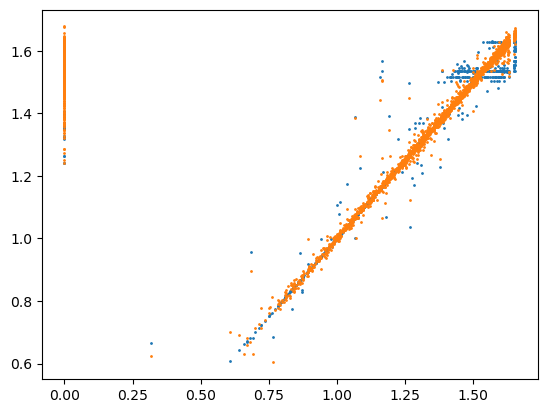

In [18]:
import matplotlib.pyplot as plt
plt.scatter(true_values, fitted_values, 1)
plt.scatter(true_values, predicted_values, 1)